# Ouvrez cette page dans Colab en cliquant sur le bouton suivant

<a target="_blank" href="https://colab.research.google.com/github/modaresimr/AdvancedPython/blob/main/C2/e2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Télécharger l'ensemble de données
Nous avons utilisé l'ensemble de données que vous avez sélectionné la semaine dernière. Nous allons maintenant le télécharger.
Le jeu de données est disponible sous le nom `data.csv` à l'adresse suivante : https://github.com/modaresimr/AdvancedPython/C2/

# Importation des bibliothèques nécessaires


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns


# Importation de l'ensemble de données dans Python

Astuce: Utilisez `read_csv`, `read_excel`, `read_json`.

In [ ]:
df = pd.read_csv('data.csv')
df

# Affichage des cinq premières lignes
Astuce: Utilisez `head`.

In [ ]:
df.head()

# Réorganisation du dataframe pour inclure uniquement certaines colonnes
Astuce: Utilisez gender age max_hr et diagnosis `[]`


In [ ]:
df=df[['gender', 'age', 'max_hr','diagnosis']]

# Analysis


## Vérifier le nombre de personnes souffrant d'une maladie cardiaque dans cet ensemble de données

In [ ]:
df['diagnosis'].value_counts()

In [ ]:
sns.countplot(x='diagnosis', data=df)


## Vérifier le sexe de personnes souffrant d'une maladie cardiaque 

In [ ]:
sns.countplot(x='gender', hue='diagnosis', data=df)

# Vérifier l'âge des personnes souffrant de maladies cardiaques

In [ ]:
???

## Analyse de l'âge des individus affectés par des maladies cardiaques

L'âge est une variable numérique essentielle dans l'analyse des maladies cardiaques. Afin de présenter ces données de manière plus significative, il est recommandé de regrouper les âges en plages, également appelées intervalles, facilitant ainsi la visualisation et la compréhension des résultats.

Une approche courante consiste à diviser les âges en intervalles de 10 ans, par exemple :
- 20-30 ans
- 30-40 ans
- 40-50 ans
- 50-60 ans
- 60-70 ans
- ...

Ce regroupement permet d'obtenir une représentation plus claire de la répartition des âges parmi les individus affectés par des maladies cardiaques. Une fois les données regroupées, des analyses statistiques plus approfondies peuvent être effectuées pour étudier les corrélations entre l'âge et d'autres variables pertinentes dans le contexte des maladies cardiaques.

In [ ]:
sns.histplot(x='age', hue='diagnosis', data=df,bins=6)

## Analyse de le max HR des individus affectés par des maladies cardiaques


In [ ]:
sns.histplot(x='max_hr', hue='diagnosis', data=df,bins=6)


# Analyse de la relation entre la fréquence cardiaque maximale (max_hr) et l'âge

In [ ]:
sns.scatterplot(x='age', y='max_hr',hue="diagnosis", data=df)

# Scikit-Learn : Introduction

Scikit-Learn, également connu sous le nom de sklearn, est une bibliothèque open-source très populaire pour l'apprentissage automatique en Python. Elle propose une large gamme d'algorithmes d'apprentissage automatique pour la classification, la régression, le clustering, la réduction de dimensionnalité, et bien d'autres tâches. Scikit-Learn est largement utilisé dans la communauté de l'apprentissage automatique en raison de sa simplicité, de sa puissance et de sa flexibilité.

Vous pouvez en savoir plus sur Scikit-Learn en visitant le site officiel : [Scikit-Learn](http://scikit-learn.org)

## Représentation des données dans scikit-learn

La plupart des algorithmes d'apprentissage automatique implémentés dans scikit-learn s'attendent à ce que les données soient stockées dans un **tableau ou une matrice bidimensionnelle**. Les tableaux peuvent être soit des tableaux `numpy`, soit dans certains cas des matrices `scipy.sparse`. La taille du tableau est attendue pour être `[n_samples, n_features]`.

- **n_samples :** Le nombre d'échantillons : chaque échantillon est un élément à traiter (par exemple, à classer). Un échantillon peut être un document, une image, un son, une vidéo, un objet astronomique, une ligne dans une base de données ou un fichier CSV, ou tout ce que vous pouvez décrire avec un ensemble fixe de caractéristiques quantitatives.

- **n_features :** Le nombre de caractéristiques ou de traits distincts pouvant être utilisés pour décrire chaque élément de manière quantitative. Les caractéristiques sont généralement des valeurs réelles, mais peuvent être booléennes ou discrètes dans certains cas.

Le nombre de caractéristiques doit être fixé à l'avance. Cependant, il peut être très dimensionnel (par exemple, des millions de caractéristiques) avec la plupart d'entre elles étant nulles pour un échantillon donné. C'est un cas où les matrices `scipy.sparse` peuvent être utiles, car elles sont beaucoup plus efficaces en termes de mémoire que les tableaux numpy.

Un algorithme de classification, par exemple, s'attend à ce que les données soient représentées sous forme de **matrice de caractéristiques** et d'un **vecteur d'étiquettes** :

$$
\text{matrice de caractéristiques : } \mathbf{X} = \left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
\text{vecteur d'étiquettes : } \mathbf{y} = [y_1, y_2, y_3, \cdots y_N]
$$

Ici, il y a $N$ échantillons et $D$ caractéristiques.

# Features

In [ ]:
x = df.drop('diagnosis', axis=1)
x

# Target (Label)

In [ ]:
y = df['diagnosis']
y


# diviser l'ensemble de données en ensembles d'entraînement et de test distincts

Le principal objectif de l'apprentissage automatique est de construire un modèle capable de généraliser efficacement à des données **non vues** auparavant. En divisant l'ensemble de données en ensembles d'entraînement et de test distincts, nous pouvons entraîner le modèle sur l'ensemble d'entraînement et évaluer sa performance sur l'ensemble de test. Cela nous permet d'estimer à quel point le modèle se comportera sur de nouvelles données, non observées auparavant.

Dans le code suivant, nous allons créer un ensemble d'entraînement à partir de 70 % de l'ensemble de données et un ensemble de test à partir des 30 % restants.
```python
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)
```

À la fin, vous pourrez voir la taille de chaque ensemble avec FString.
```python
print(f"Shape of X_train={X_train.shape}    Y_train={Y_train.shape}   ||||  X_test={X_test.shape}  Y_test={Y_test.shape}")
```
En Python, FString, également connue sous le nom de f-string, est un mécanisme de formatage qui permet d'inclure facilement des expressions à l'intérieur des chaînes de caractères. En préfixant une chaîne de caractères avec la lettre 'f' ou 'F', vous pouvez directement inclure des expressions Python entre accolades `{}` à l'intérieur de la chaîne. Ces expressions sont évaluées au moment de l'exécution et leurs valeurs sont insérées dans la chaîne.

Voici un exemple simple pour illustrer FString avec un exemple :

```python
# Définir des variables
nom = "Jean"
age = 30

# Utiliser FString pour créer une chaîne de caractères formatée
print(f"Bonjour, je m'appelle {nom} et j'ai {age} ans.")
```

Dans cet exemple :
- En utilisant FString, nous créons une chaîne de caractères formatée où `{nom}` et `{age}` sont des espaces réservés pour les valeurs des variables `nom` et `age`.
- Lorsque nous imprimons `message`, Python évalue les expressions entre les accolades et les substitue par les valeurs réelles des variables, ce qui donne la sortie suivante :
```
Bonjour, je m'appelle Jean et j'ai 30 ans.
```

FString offre un moyen concis et lisible de formater les chaînes de caractères en Python, ce qui le rend particulièrement utile pour construire des messages dynamiques ou pour afficher les valeurs des variables à l'intérieur des chaînes.

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

print(f"Shape of X_train={X_train.shape}    Y_train={Y_train.shape}   ||||  X_test={X_test.shape}  Y_test={Y_test.shape}")

# Arbre de Décision
Nous allons maintenant créer un modèle de base en utilisant un arbre de décision pour l'ensemble de données suivant.

1. Importer la classe de l'arbre de décision à partir de scikit-learn :


In [ ]:
from sklearn.tree import DecisionTreeClassifier

2. Instancier le modèle de l'arbre de décision :


In [ ]:
model = DecisionTreeClassifier()

3. Entraîner le modèle sur l'ensemble d'entraînement :

In [ ]:
model.fit(X_train, Y_train)

4. Une fois le modèle entraîné, vous pouvez l'utiliser pour faire des prédictions sur l'ensemble de test :


In [ ]:
predictions = model.predict(X_test)

5. Pour évaluer les performances du modèle, vous pouvez utiliser différentes mesures telles que l'exactitude (accuracy), la précision (precision), le rappel (recall), etc. :

La matrice de confusion est une matrice carrée où les lignes représentent les étiquettes réelles et les colonnes représentent les étiquettes prédites. Chaque cellule de la matrice donne le nombre d'observations qui appartiennent à la classe correspondante.


Pour calculer la matrice de confusion, vous pouvez utiliser la fonction confusion_matrix de scikit-learn. Voici comment le faire :

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, predictions)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True)


# Calcul de Metrics

In [ ]:
TN=conf_matrix[0,0]
TP=conf_matrix[1,1]
FP=conf_matrix[0,1]
FN=conf_matrix[1,0]

# Accuracy
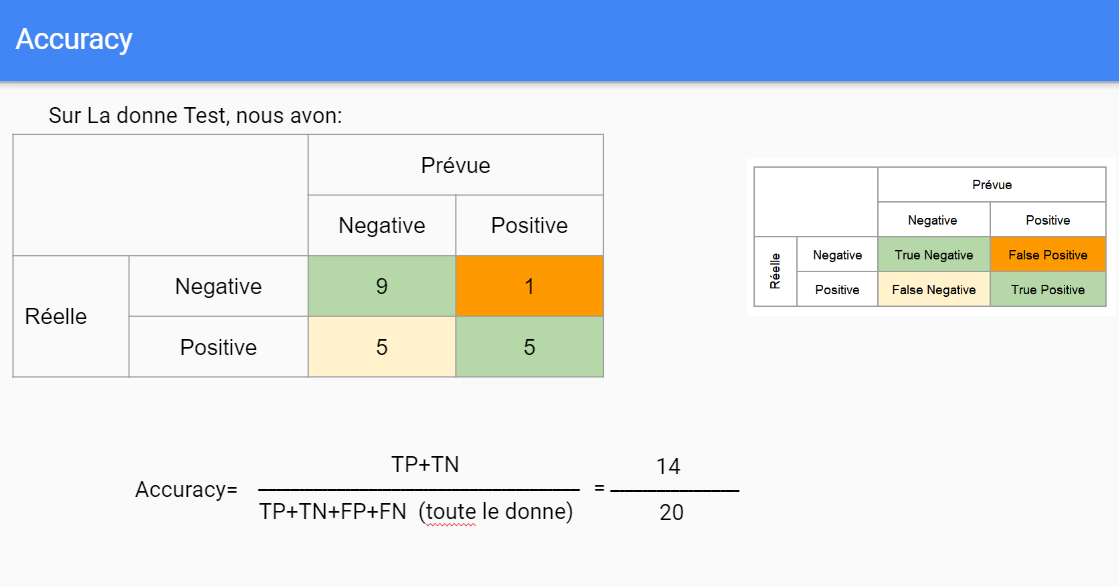

In [ ]:
???

# Recall
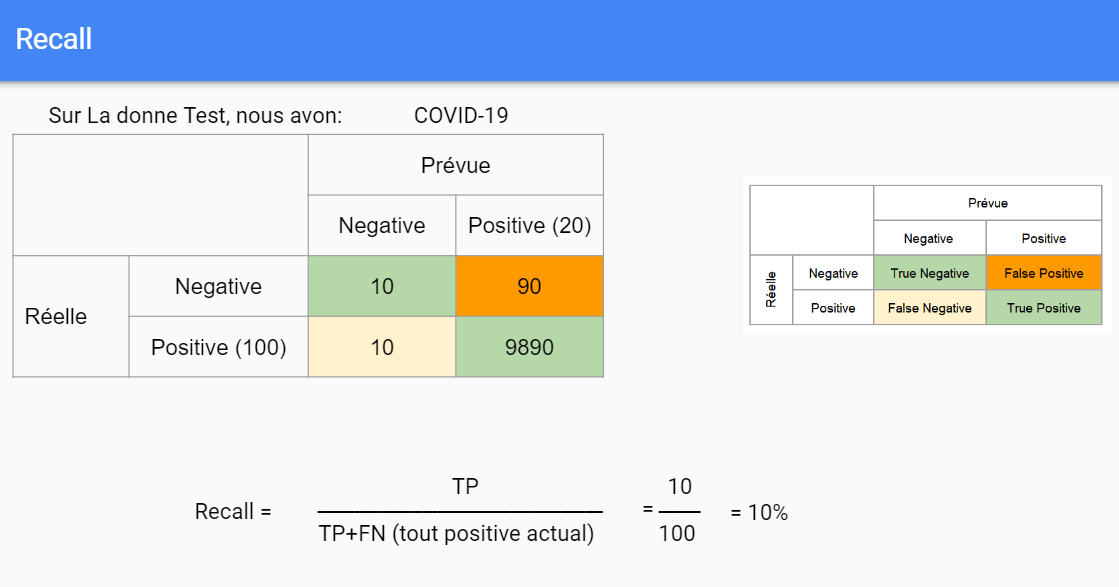

In [ ]:
???

# Precision
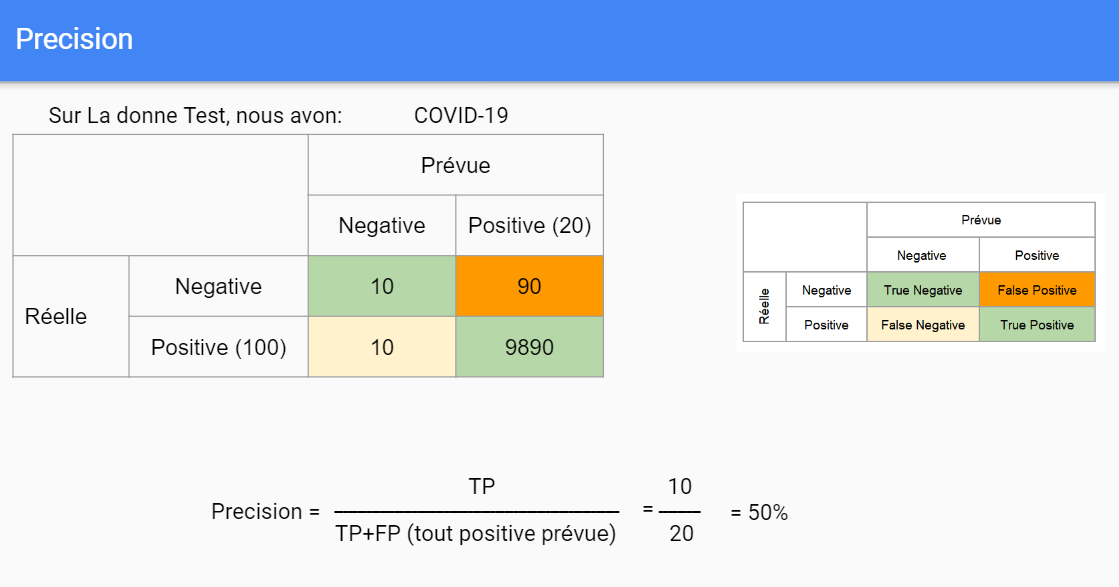

In [ ]:
???

# Utilisation d'un autre modèle dans scikit-learn

## 

# modèle du voisin le plus proche
Le modèle de plus proche voisin, également connu sous le nom de k-NN, est un algorithme simple et intuitif utilisé pour la classification et la régression. Il prédit la classe ou la valeur d'une nouvelle observation en se basant sur les voisins les plus proches dans l'ensemble de données. Le choix de k est crucial et détermine la précision du modèle.

Maintenant, entraînez et testez le modèle du voisin le plus proche


## Créer le modèle du plus proche voisin


In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# Entraînement (à l'aide de la méthode fit)






In [ ]:
????

# Test en utilisant la méthode predict

In [ ]:
????

# Évaluer le modèle en utilisant la matrice de confusion, l'exactitude, le rappel et la précision.

In [ ]:
????